# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

!!! здесь и далее буду полагать $A$ симметричной, в противном случае нужно сделать замену  при вычислении градиентов $A \rightarrow \dfrac{A^T+A}{2}$ !!!

Ответ:
1) $ \nabla^2 f(x) = A, f$ - выпукла <=> $A \geq 0$
2) $f$ - сильно выпукла <=> $A > 0$

__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

Ответ:
1) липшицевость градиента: 

$||\nabla f(x_0) - \nabla f(x_1)|| \leq L||x_0-x_1||,$

$\nabla f(x) = Ax - b \rightarrow ||A(x_0-x_1)|| \leq L||x_0-x_1||.$

$L \geq \dfrac{||Ay||}{||y||.}$

Пусть $\lambda_1, \ldots, \lambda_n$ - собственные числа матрицы $A$. Для собственных векторов:

$Ay = \lambda_k y \rightarrow L = \max{\lambda_k}$.

2) сильная выпуклость:

$(y, \nabla^2 f(x) y) \geq \mu ||y||^2$.

$y^TAy \geq \mu y^Ty.$

Для собственного вектора $y: Ay = \lambda_k y \rightarrow y^TAy = \lambda_k y^Ty \geq \mu y^Ty \rightarrow \mu = \min{\lambda_k}.$


## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

In [342]:
#ответ
import numpy as np
import scipy.linalg as la

# m > 0, L > m
def generate(d = 3, m = 1, L = 5):

    if m <= 0:
        print('WARNING!!! f не будет сильно выпуклой!!!')
        return 0

    elif L < m:
        print('L < mu? Быть такого не может!')
        return 0

    else:
        # сгенерируем диагональную матрицу по собственным числам
        if d == 1 and m == L:
            lambdas = [m]
        if d == 2:
            lambdas = [m, L]
        if d > 2:
            lambdas = np.random.uniform(low=m, high=L, size=(d-2,))
            lambdas = lambdas.tolist() + [m, L]

        A = np.diag(lambdas)
        q, _ = la.qr(np.random.rand(d, d))
        A = q.T @ A @ q
        
        # пусть и b тут будет
        b = np.random.uniform(low=-L/5, high=L/5, size=(d,))
        return A, b

In [343]:
d, m, L = 2, 1, 10
A, b = generate(d, m, L)
print(A, '\n --- \n', b)

[[ 8.29838583 -3.52406537]
 [-3.52406537  2.70161417]] 
 --- 
 [ 0.73799027 -0.48675329]


__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [344]:
#ответ
def f(x):
    return 0.5 * x.T @ A @ x - b.T @ x

def grad(x):
    return A @ x - b

def step(x, gamma):
    return x - gamma * grad(x)

def gd(x, gamma=0.01, eps=1e-6):
    f_vals = [f(x)]
    iters = [x]
    k = 0

    # остановка по критерию ||x_k+1 - x_k||^2 < eps
    while 1:
        x_0 = x
        x = step(x_0, gamma)
        k = k + 1
        f_vals.append(f(x))
        iters.append(x)
            
        error = np.linalg.norm(x - x_0)**2
        if error < eps:
            print("Остановка по критерию ||x^k+1 - x^k||^2 < eps")
            break
        if k > 1e5:
            print("Метод расходится")
            break
    
    x_opt = iters[-1]
    f_opt = f_vals[-1]
    print('Градиентный спуск:')
    print('x = ', x_opt, '\nf(x) = ', f_opt)
    return iters, f_vals

In [345]:
x_0 = b.copy() * 2
x_vals, f_vals = gd(x=x_0)

Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 0.00349769 -0.2086554 ] 
f(x) =  -0.04271210760670381


__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [346]:
#ответ
d, m, L = 10, 1, 100

A,b = generate(d, m, L)
y = np.linalg.solve(A, b)

print("Точное значение:\nx*=", np.round(y, 5), "\nf(x*)=", np.round(f(y), 5))
x_0 = b.copy()
x_vals, f_vals = gd(x=x_0)

Точное значение:
x*= [ 0.76198 -2.7247   1.15243  0.50446 -0.98566  0.29712 -2.54287  1.53495
  1.20861  1.27673] 
f(x*)= -39.00601
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 0.76420812 -2.74397966  1.1611728   0.50457592 -0.99249491  0.30163187
 -2.55929452  1.53929101  1.21387425  1.28617576] 
f(x) =  -39.00457296824681


__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 0.76420812 -2.74397966  1.1611728   0.50457592 -0.99249491  0.30163187
 -2.55929452  1.53929101  1.21387425  1.28617576] 
f(x) =  -39.00457296824681


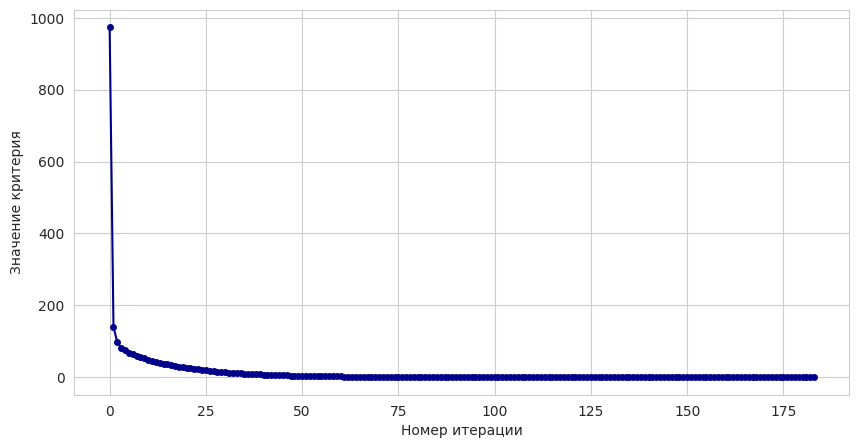

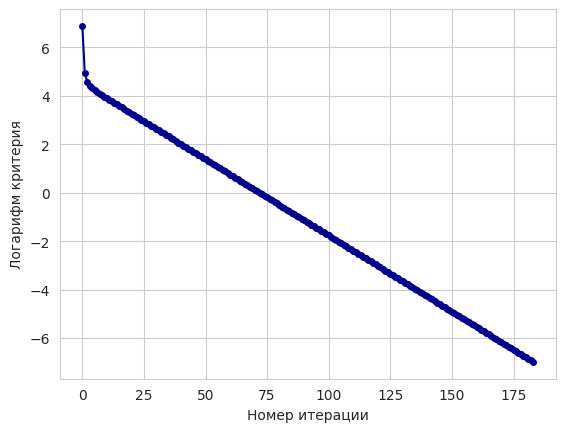

In [347]:
#ответ
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit
import math

plt.figure(figsize=(10, 5))

x_vals, f_vals = gd(x=x_0, eps=1e-6)
err = [np.linalg.norm(x_vals[k] - y)**2 for k in range(len(x_vals))]

n = [i for i in range(len(x_vals))]
plt.plot(n, err, 'darkblue', marker='o', markersize=4)
plt.xlabel(u'Номер итерации')
plt.ylabel(u'Значение критерия')
plt.show()

plt.plot(n, np.log(err), 'darkblue', marker='o', markersize=4)
plt.xlabel(u'Номер итерации')
plt.ylabel(u'Логарифм критерия')
plt.show()

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

Теоретическая зависимость:

$||x^k - x^*||^2 = \dfrac{||x^0 - x^*||^2} {e^{k\mu/L}}$

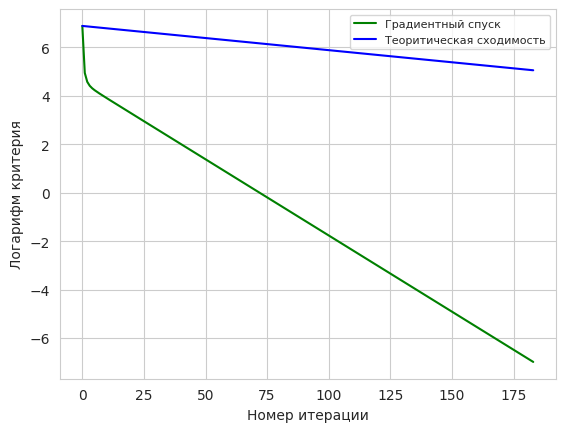

In [348]:
#ответ
err_th = [np.linalg.norm(x_0 - y)**2 / math.exp(k * m/L) for k in range(len(x_vals))]

plt.xlabel(r"Номер итерации")
plt.ylabel(r"Логарифм критерия")

plt.plot(n, np.log(err), color = 'green', label = r"Градиентный спуск")
plt.plot(n, np.log(err_th), color = 'blue', 
         label = r"Теоритическая сходимость")

plt.legend(fontsize=8)
plt.show()

Метод зашелся значительно быстрее теоретической оценки.

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 0.76420812 -2.74397966  1.1611728   0.50457592 -0.99249491  0.30163187
 -2.55929452  1.53929101  1.21387425  1.28617576] 
f(x) =  -39.00457296824681
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 0.76660672 -2.76476629  1.17060111  0.50470463 -0.99986562  0.30649698
 -2.57699962  1.5439658   1.2195504   1.29635755] 
f(x) =  -38.99981901388235
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 0.78552406 -2.92870699  1.24496062  0.50571978 -1.05799717  0.34486727
 -2.71663682  1.58083506  1.26431722  1.3766597 ] 
f(x) =  -38.84562876014678
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 0.80914629 -3.13342104  1.33781401  0.50698741 -1.13058658  0.39278064
 -2.8910031   1.62687411  1.32021781  1.47693364] 
f(x) =  -38.36228088866466


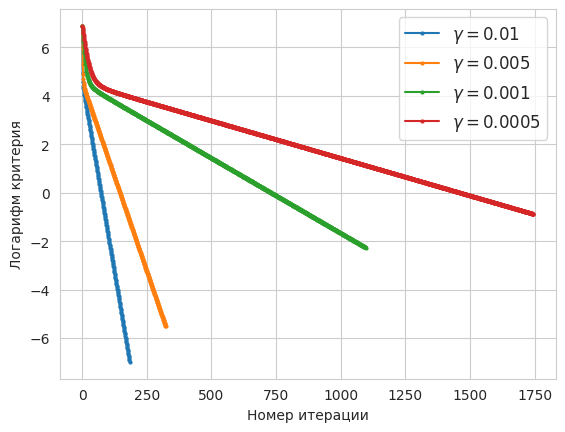

In [349]:
#ответ

gammas = [0.01, 0.005, 0.001, 0.0005]

sb.set_style("whitegrid")

plt.xlabel(u"Номер итерации")
plt.ylabel(u"Логарифм критерия")

for gamma in gammas:
    x_vals, _ = gd(x_0, gamma)
    err = [np.linalg.norm(x_vals[k] - y)**2 for k in range(len(x_vals))]
    xx = np.array(range(1, len(err) + 1))
    plt.plot(xx, np.log(err), marker='o', markersize=2, label = r"$\gamma = $" + str(gamma))

plt.legend(fontsize=12)
plt.show()

__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

Градиентный спуск не сходится при $\mu = 0$. Покажем это, взяв очень близкое к нулю значение $\mu$ и $L >> \mu$.

Точное значение:
x*= [-4328.54465 17477.73054 -7939.96602  -483.45032 -5068.4257 ] 
f(x*)= -206594.70701
Метод расходится
Градиентный спуск:
x =  [-415.67699174 1679.22679319 -763.13925379  -46.4498402  -485.90235555] 
f(x) =  -37794.41402806199


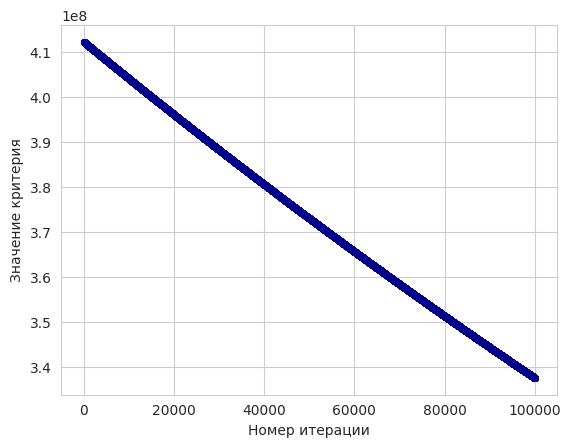

In [350]:
#ответ
d, m, L = 5, 0.001, 100
A,b = generate(d, m, L)

y = np.linalg.solve(A, b)
print("Точное значение:\nx*=", np.round(y, 5), "\nf(x*)=", np.round(f(y), 5))

x_0 = b.copy()
x_vals, f_vals = gd(x_0, gamma = 0.001)

n = [i for i in range(len(x_vals))]
err = [np.linalg.norm(x_vals[k] - y)**2 for k in range(len(x_vals))]
plt.plot(n, err, 'darkblue', marker='o', markersize=4)
plt.xlabel(u'Номер итерации')
plt.ylabel(u'Значение критерия')
plt.show()

Метод не остановился по критерию. Значение критерия остается примерно постоянным и очень большим: мы очень далеко от оптимума.

__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

In [351]:
#ответ

# критерий -- |f(x^k) - f(x^*)|, остановка по шагам
def gd2(x, y, gamma=0.01, steps=1000):
    f_vals = [f(x)]
    iters = [x]
    err = [abs(f(x) - f(y))]
    
    for k in range(steps):
        x_0 = x
        x = step(x_0, gamma)
        f_vals.append(f(x))
        iters.append(x)
        err.append(abs(f(x) - f(y)))
    
    x_opt = iters[-1]
    f_opt = f_vals[-1]
    print('Градиентный спуск:')
    print('x = ', x_opt, '\nf(x) = ', f_opt)
    return err

d, m, L = 10, 1, 100
A,b = generate(d, m, L)
y = np.linalg.solve(A, b)

print("Точное значение:\nx*=", np.round(y, 5), "\nf(x*)=", np.round(f(y), 5))
x_0 = b.copy()
err = gd2(x_0, y)

Точное значение:
x*= [ 10.69389 -10.85784  -0.3017   -9.95357   9.77239   2.26489   3.34918
  -1.08987   3.66303   3.04523] 
f(x*)= -247.79844
Градиентный спуск:
x =  [ 10.69389119 -10.857841    -0.30170177  -9.95356625   9.77239131
   2.26488899   3.3491828   -1.08986513   3.66302748   3.04523379] 
f(x) =  -247.7984446010356


Градиентный спуск:
x =  [ 10.69387017 -10.85782641  -0.30168221  -9.95360152   9.77239406
   2.26488886   3.34920255  -1.0898537    3.66301176   3.04525271] 
f(x) =  -247.798444582135
Градиентный спуск:
x =  [ 10.68508154 -10.85172965  -0.29351075  -9.96834653   9.77354093
   2.26484414   3.35745364  -1.08507958   3.65643559   3.05315997] 
f(x) =  -247.79512692507572
Градиентный спуск:
x =  [  9.5412066  -10.41440859  -0.03369476 -11.57253173   9.90736145
   2.95688171   4.13650517  -0.68144928   2.7330675    3.65055112] 
f(x) =  -202.12742156686227
Градиентный спуск:
x =  [  7.8653593  -10.62940784  -1.8588484  -12.85685422  10.16357895
   4.74771925   5.67922426  -0.01887165   1.35214584   3.7791552 ] 
f(x) =  171.84609596668588


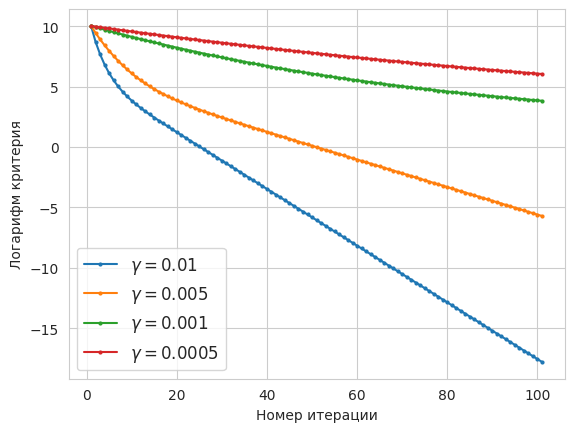

In [352]:
gammas = [0.01, 0.005, 0.001, 0.0005]

sb.set_style("whitegrid")

plt.xlabel(u"Номер итерации")
plt.ylabel(u"Логарифм критерия")

for gamma in gammas:
    err = gd2(x_0, y, gamma, steps=100)
    xx = np.array(range(1, len(err) + 1))
    plt.plot(xx, np.log(err), marker='o', markersize=2, label = r"$\gamma = $" + str(gamma))

plt.legend(fontsize=12)
plt.show()

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [353]:
#ответ